<a href="https://colab.research.google.com/github/Rogendo/MACHINE-LEARNING/blob/main/Bank_Marketing_Dataset_CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing Dataset
- The [Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) contains a reasonable large number of data related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The goal is to predict if the client will subscribe a term deposit.
- It is a fairly large dataset with 41K+ rows, a mixture of categorical and continuous columns as well as data imperfections to identify and manage.

## Dataset
The data has the following columns



Bank client data:

|col num | col name | description |
|:---|:---|:---|
| 1 | age | (numeric) |
| 2 | job | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') |
| 3 | marital | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) |
| 4 | education | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') |
| 5 | default | has credit in default? (categorical: 'no','yes','unknown') |
| 6 | housing | has housing loan? (categorical: 'no','yes','unknown') |
| 7 | loan | has personal loan? (categorical: 'no','yes','unknown') |

Related with the last contact of the current campaign:

|col num | col name | description |
|:---|:---|:---|
| 8 | contact | contact communication type (categorical: 'cellular','telephone') |
| 9 | month | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') |
| 10 | day_of_week | last contact day of the week (categorical: 'mon','tue','wed','thu','fri') |


Other attributes:

|col num | col name | description |
|:---|:---|:---|
| 11 | campaign | number of contacts performed during this campaign and for this client (numeric, includes last contact) |
| 12 | pdays | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) |
| 13 | previous | number of contacts performed before this campaign and for this client (numeric) |
| 14 | poutcome | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') |

Social and economic context attributes:

|col num | col name | description |
|:---|:---|:---|
| 15 | emp.var.rate | employment variation rate - quarterly indicator (numeric) |
| 16 | cons.price.idx | consumer price index - monthly indicator (numeric) |
| 17 | cons.conf.idx | consumer confidence index - monthly indicator (numeric) |
| 18 | euribor3m | euribor 3 month rate - daily indicator (numeric) |
| 19 | nr.employed | number of employees - quarterly indicator (numeric) |

Output variable (desired target):

|col num | col name | description |
|:---|:---|:---|
| 20 | y | This is the target column. Has the client subscribed a term deposit? (binary: 'yes','no') |

## Goal
The goal of this project is
1. Build and Tune the hyperparameters of a Sklearn model to predict the target column `y` using AWS Sagemaker
1. Deploy the model as a `Serverless Inference Endpoint` and test it
1. Run `Batch Transform` on the entire input dataset
1. Calculate the performance of the model predictions on the entire input dataset

## Recommended Steps
1. **Data Exploration:** Understand the data by looking at distributions and unique values in the columns. Are there any issues with the data?
1. **Data Cleaning:** Handle any issues you found with the data.
1. **Feature Engineering:** Handle the various datatypes by applying the appropriate feature engineering techniques
1. **Model Selection:** Choose an appropriate sklearn model for this problem and implement the sagemaker model training code
1. **Hyperparameter tuning:** Choose appropriate hyperparameter ranges and objective metric for the chosen model and implement the sagemaker hyperparameter tuning code
1. **Model training:** Submit the hyperparameter tuning job to sagemaker and monitor the execution progress
1. **Model deployment as severless inference:** Pick the best model from hyperparameter tuning, deploy it as a sagemaker serverless inference endpoint and test if it works by posting some sample data to it
1. **Batch transform:** Store the input dataset to a json lines file, deploy the model as a batch transform and run the batch transform job on the input json lines file.
1. **Performance calculation:** Calculate model performance on the entire input dataset using output of the batch transform job.

## Tips
- You can use the below code to get the S3 bucket to write any artifacts to
    ```
    import sagemaker
    session = sagemaker.Session()
    bucket = session.default_bucket()
    ```
- Are all the columns necessary or can we drop any?
- Does the data contain any issues?
- What ML task is this? Classification? Regression? Clustering?
- What are the data types of the columns? What pre-processing should you apply?
- What is the most appropriate metric for this model?

In [211]:
import pandas as pd
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/stephenleo/sagemaker-deployment/main/data/final_project_bank.csv")

print(df.shape)
df.head()

(41188, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,NaN,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,NaN,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## All the best!
Get started below...

# 1. Data Exploration

  ### Get an overview of the dataset

In [212]:

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40767 non-null  float64
 1   job             40704 non-null  object 
 2   marital         40775 non-null  object 
 3   education       40764 non-null  object 
 4   default         40797 non-null  object 
 5   housing         40809 non-null  object 
 6   loan            40733 non-null  object 
 7   contact         40748 non-null  object 
 8   month           40767 non-null  object 
 9   day_of_week     40752 non-null  object 
 10  campaign        40775 non-null  float64
 11  pdays           40739 non-null  float64
 12  previous        40770 non-null  float64
 13  poutcome        40757 non-null  object 
 14  emp.var.rate    40770 non-null  float64
 15  cons.price.idx  40819 non-null  float64
 16  cons.conf.idx   40784 non-null  float64
 17  euribor3m       40759 non-null 

###  unique values in the columns

In [213]:
for col in ['job', 'marital', 'contact','education','pdays', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome', 'y']:
    print(f'Unique values in {col}: {df[col].unique()}')

Unique values in job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired' nan
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values in marital: ['married' 'single' 'divorced' 'unknown' nan]
Unique values in contact: ['telephone' nan 'cellular']
Unique values in education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' nan 'illiterate']
Unique values in pdays: [999.  nan   6.   4.   3.   5.   1.   0.  10.   7.   8.   9.  11.   2.
  12.  13.  14.  15.  16.  21.  17.  18.  22.  25.  26.  19.  27.  20.]
Unique values in default: ['no' 'unknown' nan 'yes']
Unique values in housing: ['no' 'yes' nan 'unknown']
Unique values in loan: ['no' nan 'yes' 'unknown']
Unique values in month: ['may' nan 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values in day_of_week: ['mon' nan 'tue' 'wed' 'thu' 'fri']
Unique values in poutcome: ['nonexistent' nan 'failure' 'success']
Uniq

In [214]:
df.shape

(41188, 20)

#2. Data Cleaning
### Check for missing values and address the missing values


*   Replace 'unknown' with NaN for better handling
*   Drop rows with NaN values




In [215]:
print(df.isnull().sum())


age               421
job               484
marital           413
education         424
default           391
housing           379
loan              455
contact           440
month             421
day_of_week       436
campaign          413
pdays             449
previous          418
poutcome          431
emp.var.rate      418
cons.price.idx    369
cons.conf.idx     404
euribor3m         429
nr.employed       437
y                 398
dtype: int64


In [216]:
df.replace('unknown', pd.NA, inplace=True)

df.dropna(inplace=True)

In [217]:
print(df.isnull().sum())#missing values removed

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [218]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no


### Optionally drop irrelevant columns

In [220]:
 # df.drop(columns=['month', 'day_of_week','pdays'], inplace=True)


#3. Feature Engineering


#### Encode the columns string and unique values to numbers



In [221]:
df['marital'] = df['marital'].map({'single': 0, 'married': 1, 'divorced': 2})
df['education'] = df['education'].map({'illiterate': 0, 'university.degree': 1, 'professional.course': 2, 'basic.9y': 3,'basic.6y':4,'basic.4y':5, 'high.school':6})
df["job"] = df['job'].map({'housemaid':0, 'services':1, 'admin.':2, 'technician':3, 'blue-collar':4, 'unemployed':5, 'retired':6, 'entrepreneur':7,'management':8, 'student':9, 'self-employed':10})
df['contact'] = df['contact'].map({'cellular':0, 'telephone':1})
df["month"] = df['month'].map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'mar':4, 'apr':3, 'sep':9})
df['day_of_week'] = df['day_of_week'].map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5})
df['poutcome'] = df['poutcome'].map({'failure':0, 'nonexistent':1, 'success':2})
df['default'] = df['default'].map({'no':0, 'yes':1})
df['housing'] = df['housing'].map({'no':0, 'yes':1})
df['loan'] = df['loan'].map({'no':0, 'yes':1})
df['y']    = df['y'].map({'no':0, 'yes':1})

In [222]:
# Add this line to check for columns with object dtype that may have missed the encoding process
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col=}')
        print(df[col].unique())

In [223]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,0,1,5,0,0,0,1,5,1,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,1,1,6,0,1,0,1,5,1,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,2,1,4,0,0,0,1,5,1,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59.0,2,1,2,0,0,0,1,5,1,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24.0,3,0,2,0,1,0,1,5,1,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0


#4. Data Visualization

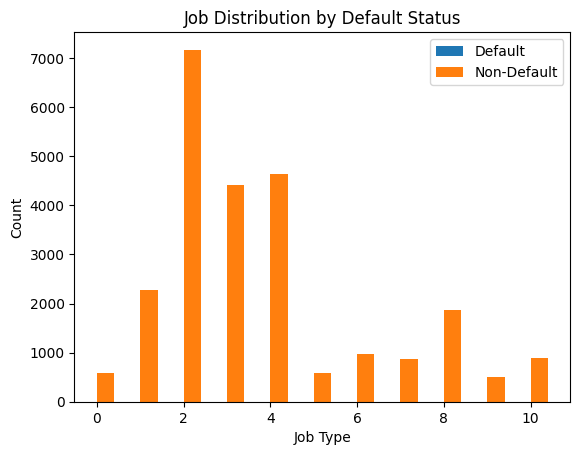

In [224]:
# @title Job Distribution by Default Status

import matplotlib.pyplot as plt

default_job_counts = df[df['default'] == 1]['job'].value_counts()
non_default_job_counts = df[df['default'] == 0]['job'].value_counts()

plt.bar(default_job_counts.index - 0.2, default_job_counts.values, width=0.4, label='Default')
plt.bar(non_default_job_counts.index + 0.2, non_default_job_counts.values, width=0.4, label='Non-Default')

plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Job Distribution by Default Status')
_ = plt.legend()

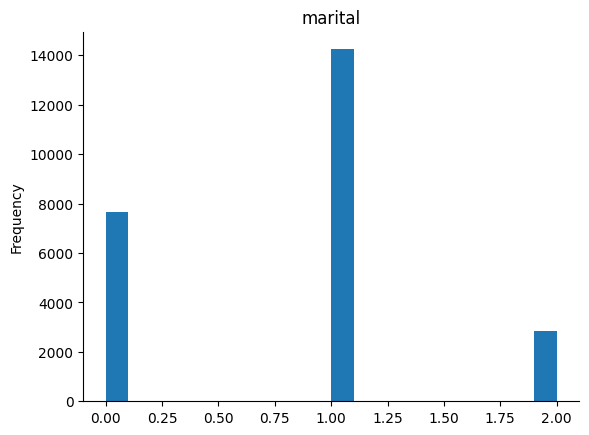

In [225]:
# @title marital

from matplotlib import pyplot as plt
df['marital'].plot(kind='hist', bins=20, title='marital')
plt.gca().spines[['top', 'right',]].set_visible(False)

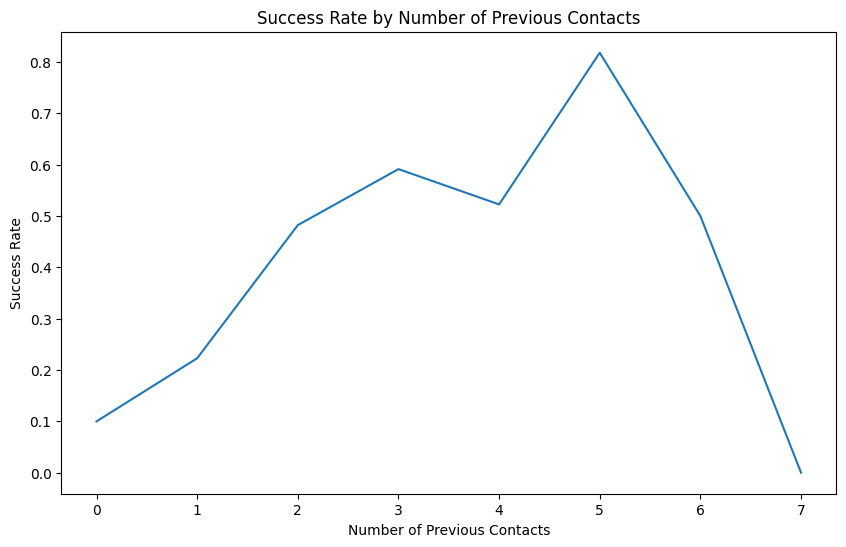

In [226]:
# @title Success Rate by Number of Previous Contacts

import matplotlib.pyplot as plt

previous_groups = df.groupby('previous')['y'].mean()

plt.figure(figsize=(10, 6))
plt.plot(previous_groups.index, previous_groups.values)
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Success Rate')
_ = plt.title('Success Rate by Number of Previous Contacts')

## Euribor 3-Month Rate Trend by Subscription Status

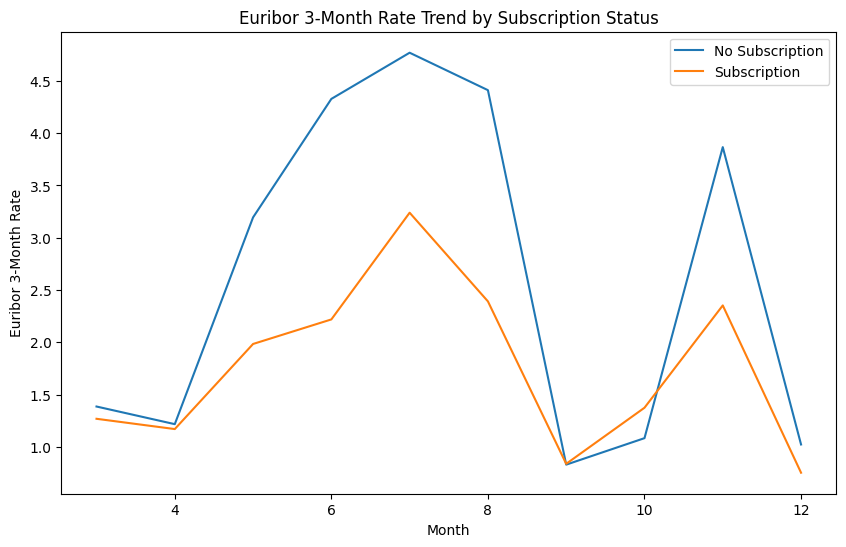

In [227]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df[df['y'] == 0].groupby('month')['euribor3m'].mean(), label='No Subscription')
plt.plot(df[df['y'] == 1].groupby('month')['euribor3m'].mean(), label='Subscription')
plt.xlabel('Month')
plt.ylabel('Euribor 3-Month Rate')
plt.title('Euribor 3-Month Rate Trend by Subscription Status')
_ = plt.legend()


## Distribution of Ages by Loan Status

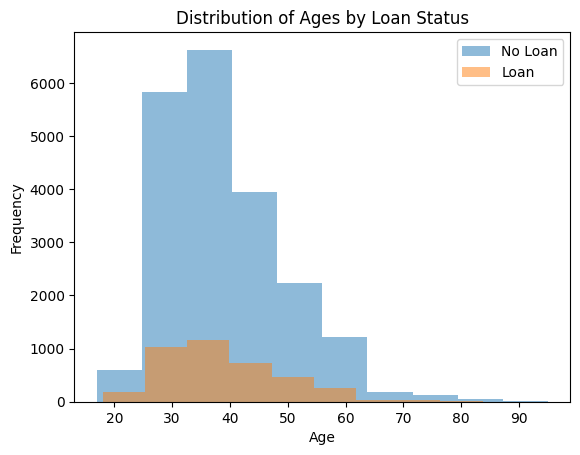

In [228]:
import matplotlib.pyplot as plt

plt.hist(df[df['loan'] == 0]['age'], alpha=0.5, label='No Loan')
plt.hist(df[df['loan'] == 1]['age'], alpha=0.5, label='Loan')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages by Loan Status')
_ = plt.legend()

## Heatmap

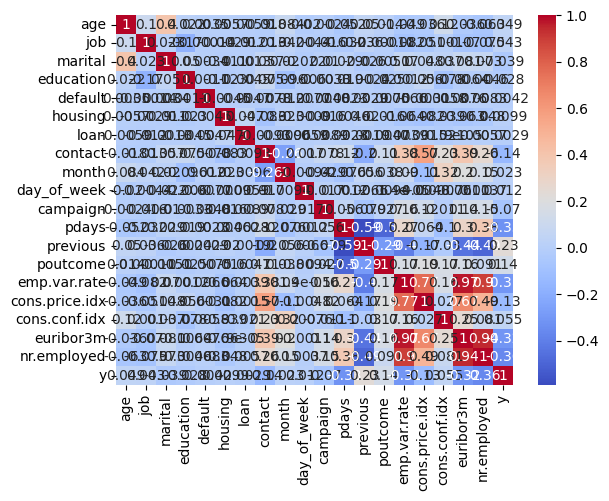

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
corr = df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

#5. Model Selection

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
X = df.drop('y', axis=1)
y = df['y']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###1. Decision Tree Classifier

In [243]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report

acc = []
model = []

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  88.78561325520306
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4313
           1       0.64      0.29      0.40       636

    accuracy                           0.89      4949
   macro avg       0.77      0.63      0.67      4949
weighted avg       0.87      0.89      0.87      4949



### Save model

In [244]:
import pickle
DT_pkl_filename = 'DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

###2. RandomForestClassifier

In [237]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
2330,38.0,4,0,3,0,1,0,1,5,2,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.856,5191.0
18784,39.0,4,1,2,0,1,0,0,7,4,15.0,999.0,0.0,1,1.4,93.918,-42.7,4.968,5228.1
38259,30.0,8,1,1,0,1,0,0,10,2,2.0,999.0,0.0,1,-3.4,92.431,-26.9,0.742,5017.5
30900,29.0,2,0,1,0,0,0,0,5,2,1.0,999.0,0.0,1,-1.8,92.893,-46.2,1.344,5099.1
3351,36.0,4,0,3,0,0,1,1,5,4,3.0,999.0,0.0,1,1.1,93.994,-36.4,4.860,5191.0


In [231]:
RandomForest = RandomForestClassifier(random_state=42)


RandomForest.fit(X_train, y_train)
training_accuracy = RandomForest.score(X_train, y_train)
testing_accuracy = RandomForest.score(X_test, y_test)

print(f'Training Accuracy: {training_accuracy}')
print(f'Testing Accuracy: {testing_accuracy}')

# Make predictions on the test set
predictions = RandomForest.predict(X_test)


Training Accuracy: 0.9952005658280287
Testing Accuracy: 0.8763386542735906


In [245]:
import pickle
DT_pkl_filename = 'RandomForest.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(RandomForest, DT_Model_pkl)
DT_Model_pkl.close()

# Evaluate the model

In [238]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Calculate performance metrics
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


Accuracy: 0.8763386542735906
F1 Score: 0.37931034482758624
Precision: 0.5342857142857143
Recall: 0.2940251572327044


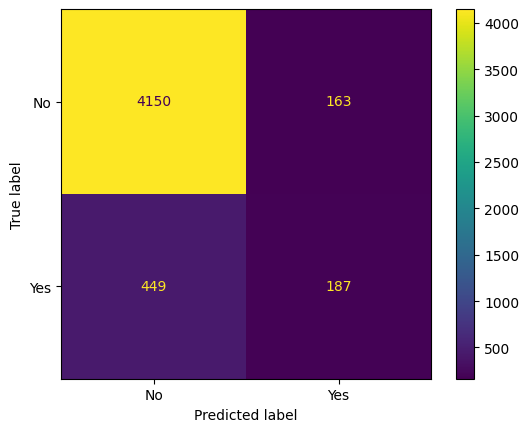

In [239]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions on the entire test set

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Display the confusion matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=['No', 'Yes']).plot()


In [247]:
# A single data point from the test set
sample = X_test.iloc[0].values.reshape(1, -1)

predicted_value = RandomForest.predict(sample)[0]
actual_value = y_test.iloc[0]

print(f"Predicted Value: {predicted_value}")
print(f"Actual Value: {actual_value}")


Predicted Value: 1
Actual Value: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Make predictions on a subset of the test set

In [248]:
predictions = RandomForest.predict(X_test[:45])

# Compare predictions with actual values
comparison = pd.DataFrame({
    'Predicted Value': predictions,
    'Actual Value': y_test[:45].values
})

print(comparison)


    Predicted Value  Actual Value
0                 1             0
1                 0             0
2                 1             1
3                 0             0
4                 0             0
5                 0             0
6                 0             0
7                 0             0
8                 0             0
9                 1             1
10                0             0
11                0             0
12                0             0
13                0             0
14                0             0
15                0             0
16                0             0
17                0             0
18                0             0
19                0             0
20                0             0
21                0             0
22                0             0
23                0             1
24                1             0
25                0             0
26                1             1
27                0             0
28            

### Example new data point (after preprocessing)


In [258]:
# Example new data point (after preprocessing)
# new_data = np.array([[55, 0, 1,5,0,0,0,1,5,1, 1.0, 999, 0,1,1.1,	93.994,	-36.4,	4.857,	5191.0]])
new_data = np.array([[38,2	,1,	1,	0,	1,	0,	0,	11,	5,	1.0,	999.0,	0.0,	1,	-1.1,	94.767,	-50.8,	1.028,	4963.6]])
# Make a prediction on the new data
new_prediction = RandomForest.predict(new_data)[0]

print(f"Predicted Value for new data: {new_prediction}")


Predicted Value for new data: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [256]:
X.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
41181,37.0,2,1,1,0,1,0,0,11,5,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41183,73.0,6,1,2,0,1,0,0,11,5,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,6,1,1,0,1,0,0,11,5,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44.0,3,1,2,0,0,0,0,11,5,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41187,74.0,6,1,2,0,1,0,0,11,5,3.0,999.0,1.0,0,-1.1,94.767,-50.8,1.028,4963.6


In [257]:
y.tail()

,y
41181,1
41183,1
41185,0
41186,1
41187,0


In [156]:
predictions

array([1, 0, 1, ..., 0, 0, 0])